<a href="https://colab.research.google.com/github/chirudukuru/DMDW/blob/main/CVD_kneighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [4]:
df

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1
5,6,49,1,1,38.1,1,0,0,93,100,22,3,1,93,35,120,70,1,6,1
6,7,44,1,0,36.7,0,0,0,98,78,18,1,0,98,21,135,90,0,0,1
7,8,51,1,1,39.4,1,0,1,96,124,24,3,0,96,21,130,75,1,0,1
8,9,58,1,1,35.5,1,0,0,95,117,43,3,1,95,60,177,80,0,1,3
9,10,67,1,1,37.8,1,0,0,90,90,16,2,0,90,21,141,74,0,0,1


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 19].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8 0 1]
 [0 0 1]
 [1 0 0]]
              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.73        11
   macro avg       0.30      0.30      0.30        11
weighted avg       0.73      0.73      0.73        11



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

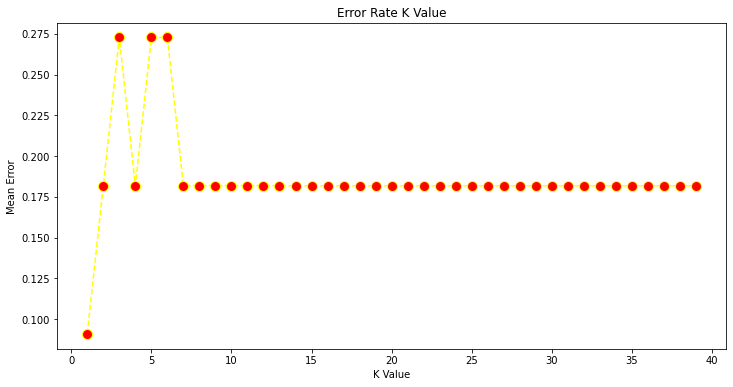

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')